# 📊 Sales Data Analysis with Python


Firstly, I have started with importing the required Python libraries:  
- **Pandas** → for data manipulation and analysis  
- **Matplotlib.pyplot** → for creating basic charts  
- **Seaborn** → for advanced and more beautiful visualizations  

Then, we load our dataset **sales_data.csv** into a pandas DataFrame called `df` so that we can explore and analyze it.


In [ ]:
import pandas as pd  # used for working like Excel 
import matplotlib.pyplot as plt # Used for plotting graphs 
import seaborn as sns # used for statistical data visualization 

df = pd.read_csv("sales_data.csv")  # open the CSV file

## 🔹 Part A - Data Exploration

In this section, we explore the dataset to understand its structure and content:

- `df.head(10)` → displays the first 10 rows of the dataset to get a preview of the data.  
- `df.shape` → shows the number of rows and columns in the dataset.  
- `df.columns` → lists all column names available in the dataset.  
- `df.isnull().sum()` → checks for any missing values in each column.  
- `df.describe()` → provides a statistical summary of numeric columns, including count, mean, standard deviation, min, max, and percentiles.


In [ ]:
# PART A - DATA EXPLORATION 
print(df.head(10))  # prints the first 10 rows
print("Shape:", df.shape)  # number of rows and columns
print("Columns:", df.columns)  # column names
print("Missing values:\n", df.isnull().sum())  # check missing values
print("Statistical summary:\n", df.describe())  # mean, std, min, max, etc.


## 🔹 Part B - Data Analysis

In this section, we perform analysis on the dataset to extract key business insights:

- `df["Sales"].sum()` → calculates the total sales across the dataset.  
- `df["Profit"].sum()` → calculates the total profit across the dataset.  
- `df.nlargest(5, "Sales")` → displays the top 5 orders with the highest sales.  
- `df.groupby("Region")["Sales"].sum()` → groups the data by region and sums sales for each region.  
- `df.groupby("Category")["Profit"].mean()` → groups the data by category and calculates the average profit for each category.  
- `pd.to_datetime(df["Date"])` → converts the Date column to datetime format for easier manipulation.  
- `df["Date"].dt.month_name()` → extracts the month name from each date and creates a new column called `Month`.  
- `df.groupby("Month")["Sales"].sum().sort_values(ascending=False)` → calculates total sales for each month and sorts them in descending order to identify the top months.


In [3]:
# PART B - DATA ANALYSIS
print("Total Sales:", df["Sales"].sum())  # total sales
print("Total Profit:", df["Profit"].sum())  # total profit

print("\nTop 5 highest sales orders:")
print(df.nlargest(5, "Sales"))  # top 5 rows with highest sales

region_sales = df.groupby("Region")["Sales"].sum()  # sales by region
print("\nSales by Region:\n", region_sales)

category_profit = df.groupby("Category")["Profit"].mean()  # avg profit by category
print("\nAverage Profit by Category:\n", category_profit)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract month names
df["Month"] = df["Date"].dt.month_name()

# Monthly sales trend
monthly_sales = df.groupby("Month")["Sales"].sum().sort_values(ascending=False)
print("\nTop 4 Months with Highest Sales:\n", monthly_sales.head(4))

Total Sales: 1325387
Total Profit: 263817

Top 5 highest sales orders:
     OrderID        Date Region     Category  Sales  Quantity  Profit
445      446  2025-03-21   East     Clothing   4995        15     492
88        89  2024-03-29   West    Groceries   4992         2     947
446      447  2025-03-22   East  Electronics   4973         2     962
73        74  2024-03-14  South    Furniture   4959         8       3
61        62  2024-03-02   East     Clothing   4958        15    -126

Sales by Region:
 Region
East     320266
North    307515
South    278277
West     419329
Name: Sales, dtype: int64

Average Profit by Category:
 Category
Clothing       549.200000
Electronics    466.801471
Furniture      571.991803
Groceries      531.340909
Name: Profit, dtype: float64

Top 4 Months with Highest Sales:
 Month
March       181543
April       173361
February    158651
January     157717
Name: Sales, dtype: int64


## 🔹 Part C - Data Visualization

In this section, we create visualizations to better understand the dataset and highlight key insights:

- **Bar Chart (Sales by Region):**  
  Displays the total sales for each region to identify which region performs best.  


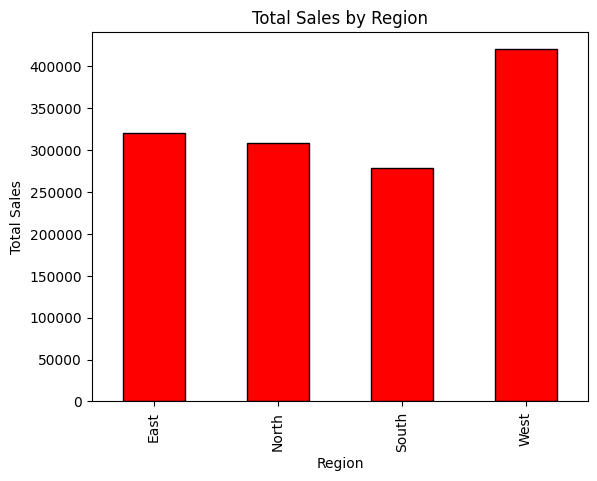

In [4]:
region_sales = df.groupby("Region")["Sales"].sum()

# This creates a bar chart for sales by region
region_sales.plot(kind="bar", color="Red", edgecolor="black") 
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


- **Line Chart (Monthly Sales Trend):**  
  Shows the sales trend over the months to understand seasonal patterns and peak sales periods.  

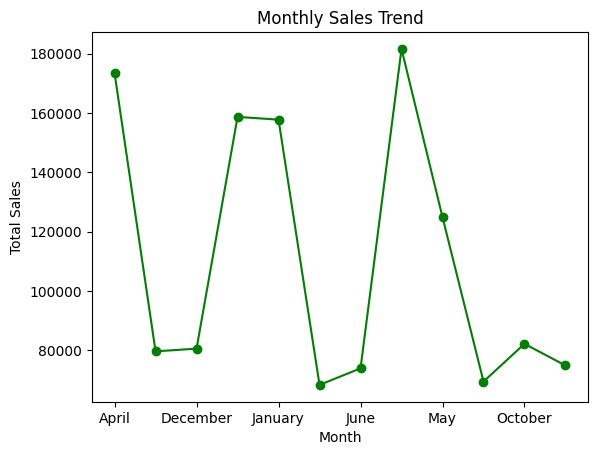

In [5]:
monthly_sales = df.groupby("Month")["Sales"].sum()

#This creates a line chart for monthly sales trend
monthly_sales.plot(kind="line", marker="o", linestyle="-", color="green")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


- **Boxplot (Profit by Category):**  
  Visualizes the distribution of profit for each product category, highlighting spread and potential outliers. 

C:\Users\Yash\AppData\Local\Temp\ipykernel_6744\1211047072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Profit", data=df, palette="Set2")


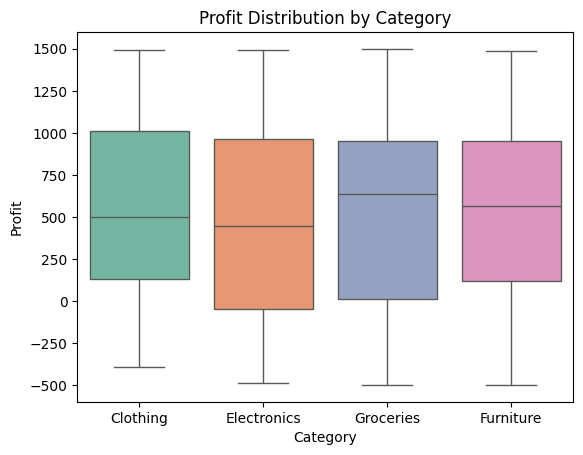

In [7]:
#This creates a box plot for profit distribution by category
sns.boxplot(x="Category", y="Profit", data=df, palette="Set2")
plt.title("Profit Distribution by Category")
plt.show()


- **Scatter Plot (Sales vs Profit):**  
  Plots sales against profit and colors points by region to explore the relationship between sales and profit across regions.  



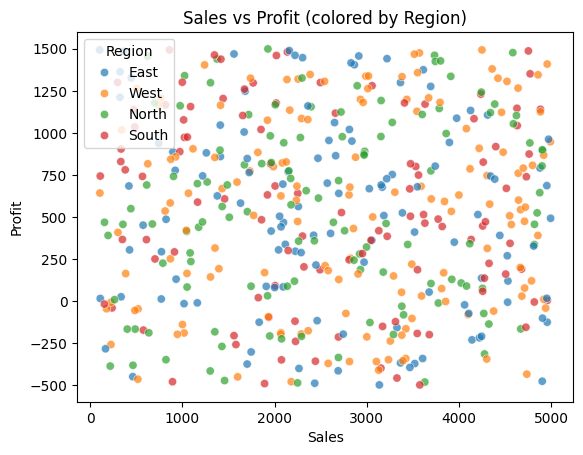

In [8]:
#This creates a scatter plot for sales vs profit colored by region
sns.scatterplot(x="Sales", y="Profit", data=df, hue="Region", alpha=0.7)
plt.title("Sales vs Profit (colored by Region)")
plt.show()


- **Correlation Heatmap:**  
  Shows the correlation between `Sales`, `Profit`, and `Quantity` to understand how these variables are related.

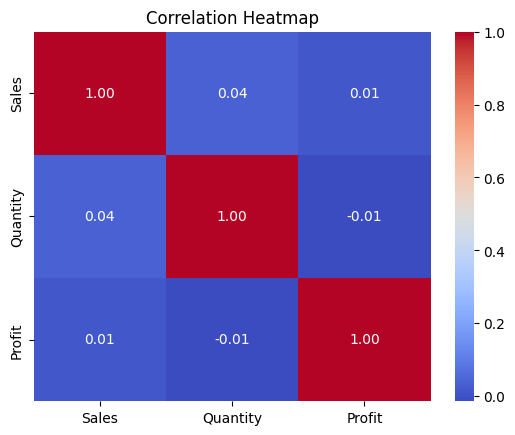

In [9]:

corr = df[["Sales", "Quantity", "Profit"]].corr()

#This creates a heatmap for correlation between Sales, Quantity, and profit
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



## 🔹 Part C – Combined Dashboard Visualization (AI-Assisted)

> **Note:** The following code was **not written manually** by me.  
> It was created with the help of AI to demonstrate how all the charts can be displayed **together in a single dashboard view**.

This code combines multiple visualizations into a single figure:
- **Bar Chart** → Total Sales by Region  
- **Line Chart** → Monthly Sales Trend  
- **Boxplot** → Profit Distribution by Category  
- **Scatter Plot** → Sales vs Profit (colored by Region)  
- **Correlation Heatmap** → Shows the relationships between Sales, Profit, and Quantity  

The combined dashboard provides a **quick overview** of key insights from the dataset in one figure.


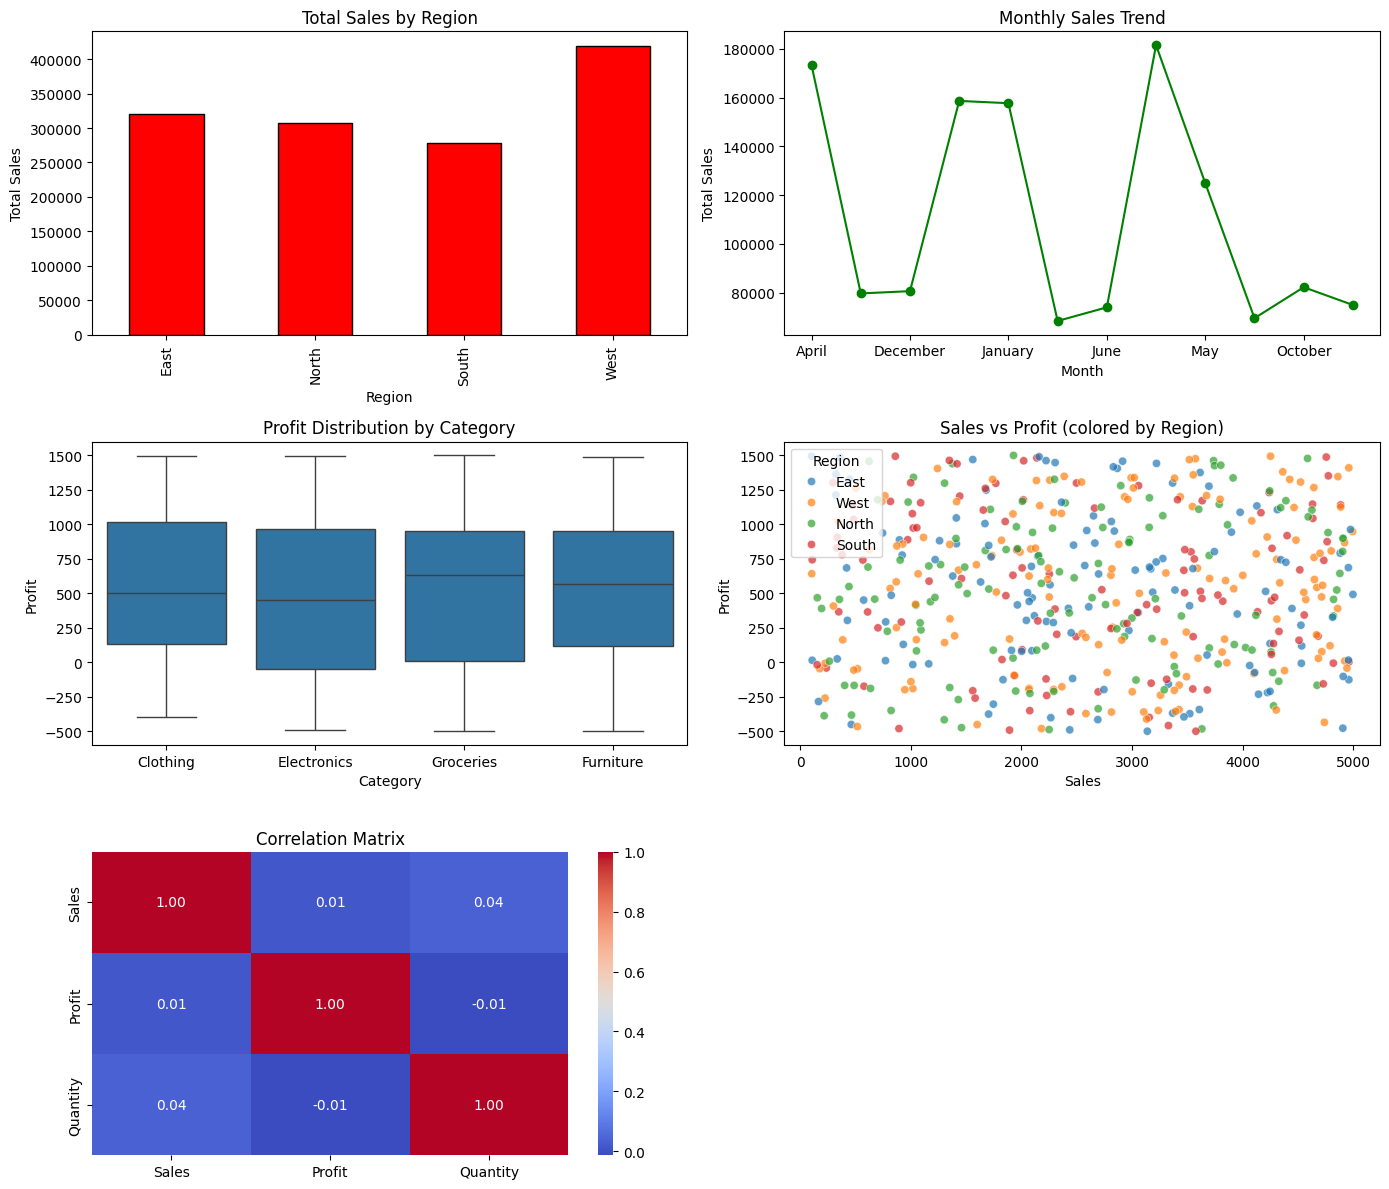

In [10]:
# PART C - DATA VISUALIZATION (All charts together)

fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3 rows, 2 cols grid

# 1. Sales by Region (Bar Chart)
region_sales.plot(kind="bar", color="Red", edgecolor="black", ax=axes[0,0])
axes[0,0].set_title("Total Sales by Region")
axes[0,0].set_xlabel("Region")
axes[0,0].set_ylabel("Total Sales")

# 2. Monthly Sales Trend (Line Chart)
monthly_sales.plot(kind="line", marker="o", color="green", ax=axes[0,1])
axes[0,1].set_title("Monthly Sales Trend")
axes[0,1].set_xlabel("Month")
axes[0,1].set_ylabel("Total Sales")

# 3. Profit Distribution by Category (Boxplot)
sns.boxplot(x="Category", y="Profit", data=df, ax=axes[1,0])
axes[1,0].set_title("Profit Distribution by Category")
axes[1,0].set_xlabel("Category")
axes[1,0].set_ylabel("Profit")

# 4. Sales vs Profit Scatterplot
sns.scatterplot(x="Sales", y="Profit", data=df, hue="Region", alpha=0.7, ax=axes[1,1])
axes[1,1].set_title("Sales vs Profit (colored by Region)")

# 5. Correlation Heatmap
corr = df[["Sales","Profit","Quantity"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2,0])
axes[2,0].set_title("Correlation Matrix")

# Hide the last empty cell (bottom-right)
axes[2,1].axis("off")

# Adjust layout so titles/labels don’t overlap
plt.tight_layout()
plt.show()


## 🔹 Conclusion & Insights

From this sales data analysis, I can draw several key insights:

- The **West region** generated the highest total sales among all regions.  
- The **Electronics category** yielded the highest average profit, making it the most profitable category.  
- **Monthly sales trends** show peak sales in **June and July**, indicating seasonal trends.  
- There is a **strong positive correlation** between Sales and Profit, meaning higher sales generally lead to higher profit.  
- Visualizations such as the combined dashboard help me quickly identify patterns and key business metrics.

---

### 👤 Project Author
**Yash Chauhan**
